In [11]:
import pandas as pd

df = pd.read_csv("../Data/heart.csv")
df.head(50)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0    63    1   3     145   233    1        0       150     0      2.3    0   
1    37    1   2     130   250    0        1       187     0      3.5    0   
2    41    0   1     130   204    0        0       172     0      1.4    2   
3    56    1   1     120   236    0        1       178     0      0.8    2   
4    57    0   0     120   354    0        1       163     1      0.6    2   
5    57    1   0     140   192    0        1       148     0      0.4    1   
6    56    0   1     140   294    0        0       153     0      1.3    1   
7    44    1   1     120   263    0        1       173     0      0.0    2   
8    52    1   2     172   199    1        1       162     0      0.5    2   
9    57    1   2     150   168    0        1       174     0      1.6    2   
10   54    1   0     140   239    0        1       160     0      1.2    2   
11   48    0   2     130   275    0        1       139     0      0.2    2   
12   49    1   1     130   266    0        1       171     0      0.6    2   
13   64    1   3     110   211    0        0       144     1      1.8    1   
14   58    0   3     150   283    1        0       162     0      1.0    2   
15   50    0   2     120   219    0        1       158     0      1.6    1   
16   58    0   2     120   340    0        1       172     0      0.0    2   
17   66    0   3     150   226    0        1       114     0      2.6    0   
18   43    1   0     150   247    0        1       171     0      1.5    2   
19   69    0   3     140   239    0        1       151     0      1.8    2   
20   59    1   0     135   234    0        1       161     0      0.5    1   
21   44    1   2     130   233    0        1       179     1      0.4    2   
22   42    1   0     140   226    0        1       178     0      0.0    2   
23   61    1   2     150   243    1        1       137     1      1.0    1   
24   40    1   3     140   199    0        1       178     1      1.4    2   
25   71    0   1     160   302    0        1       162     0      0.4    2   
26   59    1   2     150   212    1        1       157     0      1.6    2   
27   51    1   2     110   175    0        1       123     0      0.6    2   
28   65    0   2     140   417    1        0       157     0      0.8    2   
29   53    1   2     130   197    1        0       152     0      1.2    0   
30   41    0   1     105   198    0        1       168     0      0.0    2   
31   65    1   0     120   177    0        1       140     0      0.4    2   
32   44    1   1     130   219    0        0       188     0      0.0    2   
33   54    1   2     125   273    0        0       152     0      0.5    0   
34   51    1   3     125   213    0        0       125     1      1.4    2   
35   46    0   2     142   177    0        0       160     1      1.4    0   
36   54    0   2     135   304    1        1       170     0      0.0    2   
37   54    1   2     150   232    0        0       165     0      1.6    2   
38   65    0   2     155   269    0        1       148     0      0.8    2   
39   65    0   2     160   360    0        0       151     0      0.8    2   
40   51    0   2     140   308    0        0       142     0      1.5    2   
41   48    1   1     130   245    0        0       180     0      0.2    1   
42   45    1   0     104   208    0        0       148     1      3.0    1   
43   53    0   0     130   264    0        0       143     0      0.4    1   
44   39    1   2     140   321    0        0       182     0      0.0    2   
45   52    1   1     120   325    0        1       172     0      0.2    2   
46   44    1   2     140   235    0        0       180     0      0.0    2   
47   47    1   2     138   257    0        0       156     0      0.0    2   
48   53    0   2     128   216    0        0       115     0      0.0    2   
49   53    0   0     138   234    0        0       160     0      0.0    2   

    caa  thall  output  


# Обучение модели

In [12]:
X = df['thalachh'].to_numpy().reshape(-1, 1)
y = df[df.columns[13]].to_numpy().reshape(-1, 1)

Обученные параметры: b=-0.7728 a=0.0087


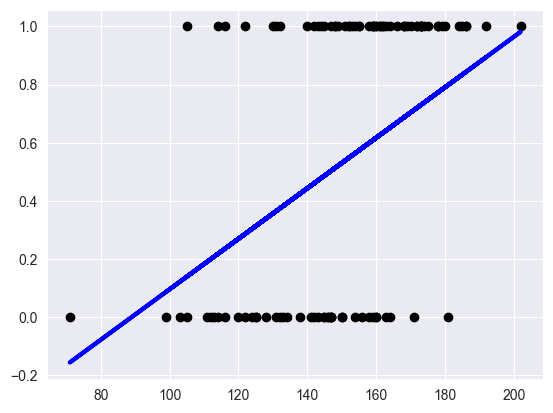

In [13]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

linr = LinearRegression()
linr.fit(x_train, y_train)
print('Обученные параметры: b=%6.4f a=%6.4f'%(linr.intercept_, linr.coef_))

y_test_pred=linr.predict(x_test)
plt.plot(x_test, y_test_pred, color='blue', linewidth=3) 
plt.scatter(x_test, y_test,  color='black')
plt.show()

# Оценка качества линейной регрессии

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("MAE = %s" % mean_absolute_error(linr.predict(x_test), y_test))
mse = mean_squared_error(linr.predict(x_test), y_test)
print('MSE = %s' % mse)

print("r2_score = %s" % r2_score(linr.predict(x_test), y_test))

MAE = 0.4026770295862928
MSE = 0.19147488741324006
r2_score = -3.647745427372012


/Users/voodo/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


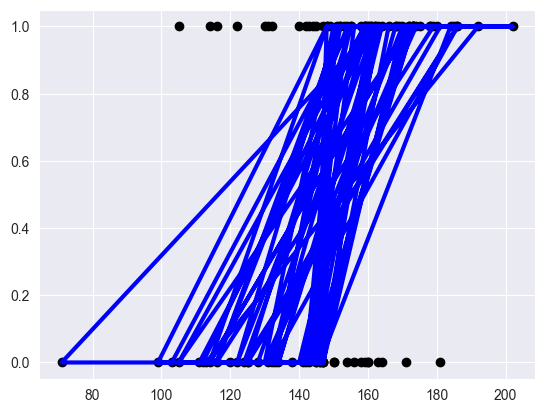

In [22]:
from sklearn.linear_model import LogisticRegression
#настройка параметров модели
model = LogisticRegression()
y_scor=model.fit(x_train, y_train)
y_score=y_scor.predict(x_test)

plt.plot(x_test, y_score, color='blue', linewidth=3) 
plt.scatter(x_test, y_test,  color='black')
plt.show()

# Оценка качества логистической регрессии

In [23]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("MAE = %s" % mean_absolute_error(model.predict(x_test), y_test))
mse = mean_squared_error(model.predict(x_test), y_test)
print('MSE = %s' % mse)

print("r2_score = %s" % r2_score(model.predict(x_test), y_test))


pred = y_score

accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average="macro")
precision = precision_score(y_test, pred, average="macro")
recall=recall_score(y_test, pred, average="macro")
print('Accuracy=',accuracy)
print('F1=',f1)
print('Precision=',precision)
print('Recall=',recall)

MAE = 0.25
MSE = 0.25
r2_score = -0.019991840065279654
Accuracy= 0.75
F1= 0.7442455242966752
Precision= 0.7435740514075888
Recall= 0.7450738916256158


# Вывод

Проведены линейная и логистическая регрессия. Показатель ошибки достаточно высок для линейной регрессии. В тот же момент точность логистической регрессии куда выше